In [1]:
%run ../talktools.py

## Classification

Classification - predicting the discrete class ($y$) of an object from a vector of input features ($\vec x$).

e.g.  $\vec x_{i=6}  = [5.1,  3.5, 1.4,  0.2]$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font size=-1>features = [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]</font>

and $y_{i=6} =$ “Iris-Setosa” 


For Iris:  Number of ($\vec x$, $y$) “instances” = 150

Number of classes = 3

In [2]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [3]:
print("feature vector shape=", X.shape)
print("class shape=", Y.shape)

feature vector shape= (150, 4)
class shape= (150,)


In [4]:
print(iris.target_names, type(iris.target_names))
print(iris.feature_names, type(iris.feature_names))

['setosa' 'versicolor' 'virginica'] <class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] <class 'list'>


In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

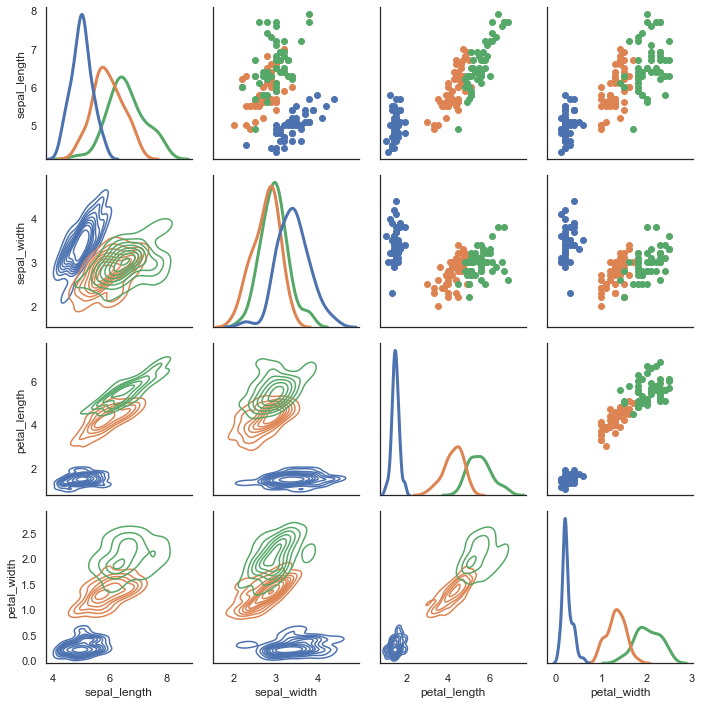

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

df = sns.load_dataset("iris")

g = sns.PairGrid(df, diag_sharey=False, hue="species")
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

 - KNN Classification:  `neighbors.KNeighborsClassifier`
 - LDA / QDA:  `lda.LDA` / `lda.QDA`
 - Naive Bayes: `naive_bayes.GaussianNB`
 - Support Vector Machines:   `svm.SVC`
 - Classification Trees:  `tree.DecisionTreeClassifier`
 - Random Forest:  `ensemble.RandomForestClassifier`
 - Multi-class & multi-label Classification is supported: `multiclass.OneVsRest`  `multiclass.OneVsOne` 

## Support Vector Machines (1992)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Svm_intro.svg/2000px-Svm_intro.svg.png" width="50%">

In [ ]:
# SVM with polynomial kernel visualization
from IPython.display import YouTubeVideo
YouTubeVideo("3liCbRZPrZA")

/Users/jbloom/ay250/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


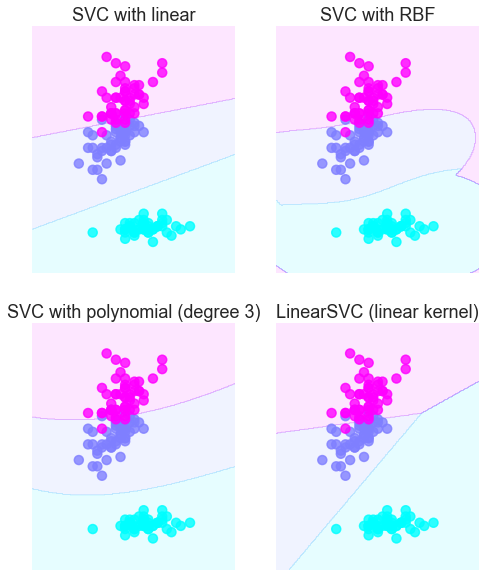

In [18]:
# adapted from http://scikit-learn.org/0.13/auto_examples/svm/plot_iris.html#example-svm-plot-iris-py
%matplotlib inline
import numpy as np
from sklearn import svm, datasets

sns.set_context("talk")

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 1:3]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target

h = 0.02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)
lin_svc = svm.LinearSVC(C=C).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear',
          'SVC with RBF',
          'SVC with polynomial (degree 3)',
          'LinearSVC (linear kernel)']

clfs = [svc, rbf_svc, poly_svc, lin_svc]

f,axs = plt.subplots(2,2,figsize=(8,10))

for i, clf in enumerate(clfs):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    ax = axs[i//2][i % 2]
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.1, cmap=plt.get_cmap("cool"))
    ax.axis('off')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=Y,cmap=plt.get_cmap("cool"))

    ax.set_title(titles[i])

http://cs.stanford.edu/people/karpathy/svmjs/demo/

## kNearestNeighbors (kNN)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/2000px-KnnClassification.svg.png" width="50%">

For each test point, $\vec x_i$ find the $k$-nearest 
instances in the training data
Classify the point according to the majority vote of their 
class labels.

<img src="http://cs231n.github.io/assets/knn.jpeg">

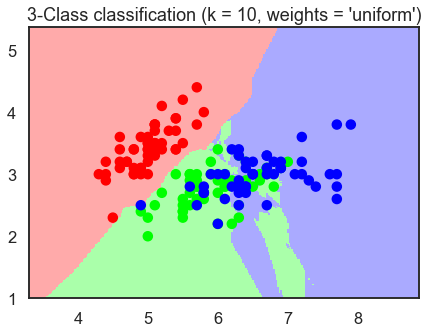

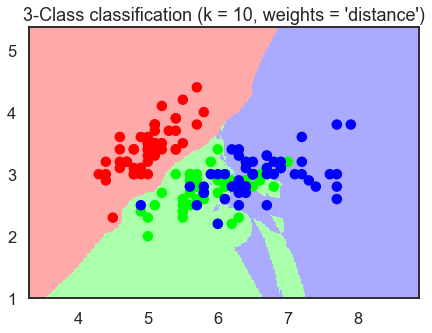

In [19]:
# %load http://scikit-learn.org/stable/_downloads/plot_classification.py
"""
================================
Nearest Neighbors Classification
================================

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.
"""

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

import seaborn as sns
sns.set_context("talk")

n_neighbors = 10

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

In [20]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
print("predicted:", knn.predict(iris_X_test))
print("actual   :", iris_y_test)

predicted: [1 0 2 1 1 0 2 2 0 0]
actual   : [1 0 2 1 1 0 2 2 0 0]


# model persistence

we might sometimes build a model that take a long time to construct. We can easily save the model (on disk) for future use.

http://scikit-learn.org/stable/modules/model_persistence.html

In [21]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

SVC()

In [22]:
import pickle
s    = pickle.dumps(clf)
clf2 = pickle.loads(s)
print("predictions:",clf2.predict(X)[::15], " (saved model)")
print("true labels:",y[::15])

predictions: [0 0 0 0 1 1 1 2 2 2]  (saved model)
true labels: [0 0 0 0 1 1 1 2 2 2]


In [24]:
import joblib
joblib.dump(clf, 'filename.pkl') 

['filename.pkl']

In [25]:
import joblib
clf3 = joblib.load('filename.pkl') 

In [26]:
print("predictions:",clf3.predict(X)[::15], " (saved model)")
print("true labels:",y[::15])

predictions: [0 0 0 0 1 1 1 2 2 2]  (saved model)
true labels: [0 0 0 0 1 1 1 2 2 2]


joblib = "more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators, but can only pickle to the disk and not to a string"